# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *Mukhomorova Olga*</center>

#### <hr /> General Information

**Due Date:** 13.03.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

In [1]:
import scipy.io
import os
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

os.chdir('C:/Jupyter/notebooks')
data = scipy.io.loadmat('flickr.mat')

In [2]:
G = nx.DiGraph(data['A'])

We have directed graph. It means, that node degree centrality metric should be calculated for incoming and outcoming edges separately. We also have HITS algorthm, which returns two rankings for hubs and authorities (oucoming and incoming):
![](https://i.gyazo.com/ae21a777b034c707d62a0668b9eb63cc.png)

But what should we do with PageRank algorithm? It's definition is the following:
>In short PageRank is a “vote”, by all the other pages on the Web, about how important a page is. A link to a page counts as a vote of support. If there’s no link there’s no support (but it’s an abstention from voting rather than a vote against the page).
Quoting from the original Google paper, PageRank is defined like this:
We assume page A has pages T1...Tn which point to it (i.e., are citations). The parameter d is a damping factor which can be set between 0 and 1. We usually set d to 0.85. There are more details about d in the next section. Also C(A) is defined as the number of links going out of page A. The PageRank of a page A is given as follows:
PR(A) = (1-d) + d (PR(T1)/C(T1) + ... + PR(Tn)/C(Tn))

(source http://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm)

This means, that inportance of node A depends on incoming edges (in other words PR is based on incoming links to webpage and their 'quality' and 'importance') and we shoud compare separately degree centrality, pagerank, authorities for incoming and degree centrality, hubs for outcoming.

In [3]:
import operator

#degree centrality
#INCOMING
dc_in = sorted(nx.in_degree_centrality(G).items(), key=operator.itemgetter(1))
dc_in.reverse()
dc_in = dc_in[:50]
#OUTCOMING
dc_out = sorted(nx.out_degree_centrality(G).items(), key=operator.itemgetter(1))
dc_out.reverse()
dc_out = dc_out[:50]

#pagerank
pr = sorted(nx.pagerank(G).items(), key=operator.itemgetter(1))
pr.reverse()
pr = pr[:50]

#hubauthorities
h,a = nx.hits(G)
hubs = sorted(h.items(), key=operator.itemgetter(1))
auth = sorted(a.items(), key=operator.itemgetter(1))
hubs.reverse(); auth.reverse()
hubs = hubs[:50]; auth = auth[:50]

To compare 50-long ranked vectors, we will use **kendalltau (KT)** ranking correlation measure:

In [5]:
import scipy.stats
import numpy as np

print 'For INCOMING edges:'
print 'KT coefficient between '+'in degree centrality '+'and '+'pagerank'+': '+ str(scipy.stats.kendalltau(np.array([int(i[0]) for i in dc_in]) ,np.array([int(i[0]) for i in pr]))[0])
print 'KT coefficient between '+'in degree centrality '+'and '+'authorities'+': '+ str(scipy.stats.kendalltau(np.array([int(i[0]) for i in dc_in]) ,np.array([int(i[0]) for i in auth]))[0])
print 'KT coefficient between '+'authorities '+'and '+'pagerank'+': '+ str(scipy.stats.kendalltau(np.array([int(i[0]) for i in auth]) ,np.array([int(i[0]) for i in pr]))[0])
print''
print 'For OUTCOMING edges:'
print 'KT coefficient between '+'out degree centrality '+'and '+'hubs'+': '+ str(scipy.stats.kendalltau(np.array([int(i[0]) for i in dc_out]) ,np.array([int(i[0]) for i in hubs]))[0])

For INCOMING edges:
KT coefficient between in degree centrality and pagerank: 0.118367346939
KT coefficient between in degree centrality and authorities: -0.0367346938776
KT coefficient between authorities and pagerank: -0.216326530612

For OUTCOMING edges:
KT coefficient between out degree centrality and hubs: 0.17387755102


Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement.

----------------------------------------------------------------------
Now we will provide top-50 names for each type of ranking:

In [6]:
print 'In degree centrality (top 50 followed):'
print map(str.strip,[data['names'][i].encode("utf-8") for i in [int(i[0]) for i in dc_in]])
print ''
print 'Out degree centrality (top 50 that follow others):'
print map(str.strip,[data['names'][i].encode("utf-8") for i in [int(i[0]) for i in dc_out]])
print ''
print 'Pagerank (top 50 important users):'
print map(str.strip,[data['names'][i].encode("utf-8") for i in [int(i[0]) for i in pr]])
print ''
print 'Hubs (top 50  that follow others):'
print map(str.strip,[data['names'][i].encode("utf-8") for i in [int(i[0]) for i in hubs]])
print ''
print 'Authorities (top 50 followed):'
print map(str.strip,[data['names'][i].encode("utf-8") for i in [int(i[0]) for i in auth]])
print ''

In degree centrality (top 50 followed):
['awfulsara', 'drp', '*Ivan*', 'antimethod', 'DrJoanne', 'BombDog', 'Simon Pais', 'deborah lattimore', 'MaD Gi\xc3\x82\xc2\xaeL\xc3\xa2\xc2\x80\xc2\xa2\xc3\xa2\xc2\x84\xc2\xa2', ':Nikola', 'notraces', 'cymagen', 'aleyna', 'lorrainemd', 'artofgold', '*starlet*', 'romanlily', 'Pandarine', 'hot_luscious', 'jkottke', 'Mylens', 'Mareen Fischinger', 'slowernet', 'gu@va', 'bernardo.borghetti', 'pbowers', 'CherryVega', 'underbunny', 'Merina', 'Loobylu', '* HoNe$t *', '.lush', 'fraying', 'pixietart', 'naftalina007', 'fd', 'aquanerds', 'Joi', 'Esther_G', 'carf', 'Sexy Swedish Babe', '!!uAe prince!!', 'Marcelo  Montecino', 'callipygian', 'Agridulce', 'Least Wanted', 'Gayla', 'anildash', 'reddirtrose', 'tecgirl']

Out degree centrality (top 50 that follow others):
['anildash', 'tozzer', 'AtiRanA', 'pixietart', 'jakedobkin', 'Buntekuh', 'Jakes_World', 'brainware3000', 'maximolly', 'Andreia Lopes', 'inthegan', 'elvis1967', '990000', ': Esther', 'spanier', 'Cha

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://www.hse.ru/data/2016/03/05/1125656999/universities.zip) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [7]:
import numpy as np
os.chdir('C:/Jupyter/notebooks')
berkeley = scipy.io.loadmat('Berkeley13.mat')

In [13]:
#berkeley
G = nx.DiGraph(berkeley['A'])
br=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%br)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in berkeley['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in berkeley['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in berkeley['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in berkeley['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in berkeley['local_info']])))
b1=nx.attribute_assortativity_coefficient(G,'1')
b2=nx.attribute_assortativity_coefficient(G,'2')
b3=nx.attribute_assortativity_coefficient(G,'3')
b4=nx.attribute_assortativity_coefficient(G,'4')
b5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(b1)
print 'assortativity coefficient for major (cat): '+str(b2)
print 'assortativity coefficient for dormitory (num): '+str(b3)
print 'assortativity coefficient for year (num): '+str(b4)
print 'assortativity coefficient for high school (num): '+str(b5)

node degree assortativity (mixining by node degree) 0.01031
assortativity coefficient for gender (cat): 0.0409228376393
assortativity coefficient for major (cat): 0.058255029946
assortativity coefficient for dormitory (num): 0.14727644076
assortativity coefficient for year (num): 0.308121015806
assortativity coefficient for high school (num): 0.0773753653543


In [14]:
#Caltech
Caltech = scipy.io.loadmat('Caltech36.mat')
G = nx.DiGraph(Caltech['A'])
cr=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%cr)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in Caltech['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in Caltech['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in Caltech['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in Caltech['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in Caltech['local_info']])))
c1=nx.attribute_assortativity_coefficient(G,'1')
c2=nx.attribute_assortativity_coefficient(G,'2')
c3=nx.attribute_assortativity_coefficient(G,'3')
c4=nx.attribute_assortativity_coefficient(G,'4')
c5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(c1)
print 'assortativity coefficient for major (cat): '+str(c2)
print 'assortativity coefficient for dormitory (num): '+str(c3)
print 'assortativity coefficient for year (num): '+str(c4)
print 'assortativity coefficient for high school (num): '+str(c5)

node degree assortativity (mixining by node degree) -0.06527
assortativity coefficient for gender (cat): 0.0463314364559
assortativity coefficient for major (cat): 0.0347194237236
assortativity coefficient for dormitory (num): 0.349153100873
assortativity coefficient for year (num): 0.237531904813
assortativity coefficient for high school (num): 0.00266977930658


In [15]:
#Harvard
Harvard = scipy.io.loadmat('Harvard1.mat')
G = nx.DiGraph(Harvard['A'])
hr=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%hr)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in Harvard['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in Harvard['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in Harvard['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in Harvard['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in Harvard['local_info']])))
h1=nx.attribute_assortativity_coefficient(G,'1')
h2=nx.attribute_assortativity_coefficient(G,'2')
h3=nx.attribute_assortativity_coefficient(G,'3')
h4=nx.attribute_assortativity_coefficient(G,'4')
h5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(h1)
print 'assortativity coefficient for major (cat): '+str(h2)
print 'assortativity coefficient for dormitory (num): '+str(h3)
print 'assortativity coefficient for year (num): '+str(h4)
print 'assortativity coefficient for high school (num): '+str(h5)

node degree assortativity (mixining by node degree) 0.14505
assortativity coefficient for gender (cat): 0.0452699773794
assortativity coefficient for major (cat): 0.0496769283286
assortativity coefficient for dormitory (num): 0.12567663505
assortativity coefficient for year (num): 0.421159642116
assortativity coefficient for high school (num): 0.0239867253741


In [16]:
#Oklahoma
Oklahoma = scipy.io.loadmat('Oklahoma97.mat')
G = nx.DiGraph(Oklahoma['A'])
o_r=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%o_r)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in Oklahoma['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in Oklahoma['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in Oklahoma['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in Oklahoma['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in Oklahoma['local_info']])))
o1=nx.attribute_assortativity_coefficient(G,'1')
o2=nx.attribute_assortativity_coefficient(G,'2')
o3=nx.attribute_assortativity_coefficient(G,'3')
o4=nx.attribute_assortativity_coefficient(G,'4')
o5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(o1)
print 'assortativity coefficient for major (cat): '+str(o2)
print 'assortativity coefficient for dormitory (num): '+str(o3)
print 'assortativity coefficient for year (num): '+str(o4)
print 'assortativity coefficient for high school (num): '+str(o5)

node degree assortativity (mixining by node degree) 0.07367
assortativity coefficient for gender (cat): 0.0928372959827
assortativity coefficient for major (cat): 0.0363790887617
assortativity coefficient for dormitory (num): 0.280335243729
assortativity coefficient for year (num): 0.20116469147
assortativity coefficient for high school (num): 0.139468406924


In [17]:
#Princeton
Princeton = scipy.io.loadmat('Princeton12.mat')
G = nx.DiGraph(Princeton['A'])
pr=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%pr)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in Princeton['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in Princeton['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in Princeton['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in Princeton['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in Princeton['local_info']])))
p1=nx.attribute_assortativity_coefficient(G,'1')
p2=nx.attribute_assortativity_coefficient(G,'2')
p3=nx.attribute_assortativity_coefficient(G,'3')
p4=nx.attribute_assortativity_coefficient(G,'4')
p5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(p1)
print 'assortativity coefficient for major (cat): '+str(p2)
print 'assortativity coefficient for dormitory (num): '+str(p3)
print 'assortativity coefficient for year (num): '+str(p4)
print 'assortativity coefficient for high school (num): '+str(p5)

node degree assortativity (mixining by node degree) 0.09109
assortativity coefficient for gender (cat): 0.0506107399953
assortativity coefficient for major (cat): 0.0543901188714
assortativity coefficient for dormitory (num): 0.0946784195542
assortativity coefficient for year (num): 0.446744620584
assortativity coefficient for high school (num): 0.018783655245


In [18]:
#Texas
Texas = scipy.io.loadmat('Texas80.mat')
G = nx.DiGraph(Texas['A'])
tr=nx.degree_assortativity_coefficient(G)
print 'node degree assortativity (mixining by node degree) '+str("%3.5f"%tr)
#assuming that gender is categorical feature
nx.set_node_attributes(G, '1', dict(zip(list(np.arange(len(G))), [int(i[1]) for i in Texas['local_info']])))
#assuming that major is categorical feature
nx.set_node_attributes(G, '2', dict(zip(list(np.arange(len(G))), [int(i[2]) for i in Texas['local_info']])))
#assuming that dormitory is numerical feature
nx.set_node_attributes(G, '3', dict(zip(list(np.arange(len(G))), [int(i[4]) for i in Texas['local_info']])))
#assuming that year is numerical feature
nx.set_node_attributes(G, '4', dict(zip(list(np.arange(len(G))), [int(i[5]) for i in Texas['local_info']])))
#assuming that high school is numerical feature
nx.set_node_attributes(G, '5', dict(zip(list(np.arange(len(G))), [int(i[6]) for i in Texas['local_info']])))
t1=nx.attribute_assortativity_coefficient(G,'1')
t2=nx.attribute_assortativity_coefficient(G,'2')
t3=nx.attribute_assortativity_coefficient(G,'3')
t4=nx.attribute_assortativity_coefficient(G,'4')
t5=nx.attribute_assortativity_coefficient(G,'5')
print 'assortativity coefficient for gender (cat): '+str(t1)
print 'assortativity coefficient for major (cat): '+str(t2)
print 'assortativity coefficient for dormitory (num): '+str(t3)
print 'assortativity coefficient for year (num): '+str(t4)
print 'assortativity coefficient for high school (num): '+str(t5)

node degree assortativity (mixining by node degree) 0.16389
assortativity coefficient for gender (cat): 0.0796930681412
assortativity coefficient for major (cat): 0.0597127278334
assortativity coefficient for dormitory (num): 0.204837604339
assortativity coefficient for year (num): 0.246194684162
assortativity coefficient for high school (num): 0.147992848231


Now we will compare results

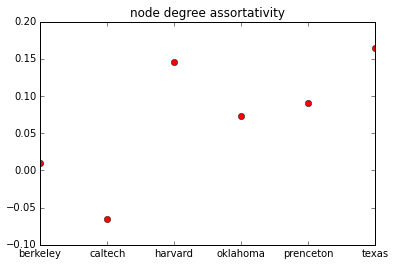

In [43]:
x=['berkeley','caltech','harvard','oklahoma','prenceton','texas']
y=[br, cr, hr, o_r, pr, tr]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('node degree assortativity')

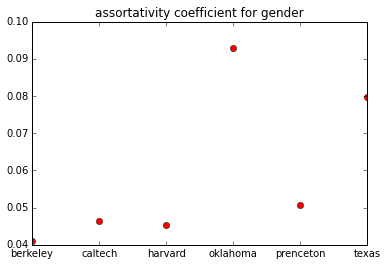

In [44]:
y=[b1, c1, h1, o1, p1, t1]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('assortativity coefficient for gender')

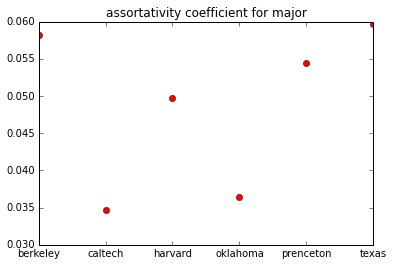

In [45]:
y=[b2, c2, h2, o2, p2, t2]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('assortativity coefficient for major')

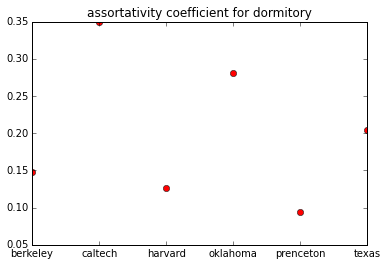

In [46]:
y=[b3, c3, h3, o3, p3, t3]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('assortativity coefficient for dormitory')

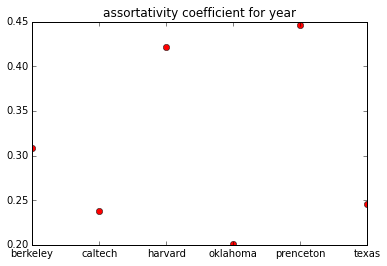

In [47]:
y=[b4, c4, h4, o4, p4, t4]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('assortativity coefficient for year')

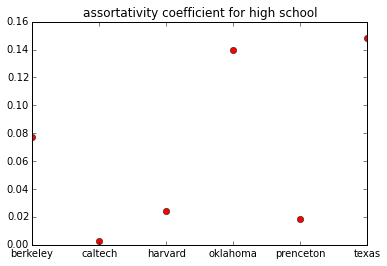

In [48]:
y=[b5, c5, h5, o5, p5, t5]
axes = plt.figure().add_subplot(111)
plt.plot(y, 'ro')
axes.set_xticklabels(x)
plt.title('assortativity coefficient for high school')